# 0. 필요 패키지 설치

In [ ]:
pip install numpy

In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_16296\2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# A. 데이터 전처리 - 데이터 읽어오기
Pandas를 사용하여 csv 파일(NFLX.csv)을 DataFrame으로 읽어오기 <br>
이때 ['Date', 'Open', 'High', 'Low', 'Close'] 필드만 읽어오도록 구성

In [2]:
csv_path = "archive/NFLX.csv"

# df = pd.read_csv(csv_path, usecols=range(0,5))
   #pd.메서드를 쓰면 csv 등의 파일을 바로 열어볼 수 있음.
   #usecols= 불러올 칼럼의 인덱스 번호나 이름을 지정. 메서드 형식이 아닌데 왜? pandas가 그렇게 했대.. 쩝..
   #df.head() 메서드는 행의 길이를 지정할 때 사용

df = pd.read_csv(csv_path)

df = df[["Date", "Open", "High", "Low", "Close"]]
df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


# B. 데이터 전처리 - 2021년 이후의 종가 데이터 출력하기
csv파일을 df로 읽어와 2021년 이후의 데이터만 필터링 <br>
필터링이 완료된 df의 종가 데이터를 matplotlib을 사용하여 시각화

## 1. 데이터 날짜에 따른 필터링

In [3]:
df.dtypes # 현재 "Date"의 타입은 object.

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [4]:
df["Date"] = pd.to_datetime(df["Date"])

df.dtypes # "Date"의 타입이 object에서 datetime64로 변환된 것을 확인할 수 있다. 

Date     datetime64[ns]
Open            float64
High            float64
Low             float64
Close           float64
dtype: object

In [5]:
df["Date"]

0      2018-02-05
1      2018-02-06
2      2018-02-07
3      2018-02-08
4      2018-02-09
          ...    
1004   2022-01-31
1005   2022-02-01
1006   2022-02-02
1007   2022-02-03
1008   2022-02-04
Name: Date, Length: 1009, dtype: datetime64[ns]

In [6]:
filtered_df = df[df["Date"] >= '2021-01-01']
# 2021년 이후의 데이터만 가져왔다!

filtered_df

,Date,Open,High,Low,Close
733,2021-01-04,539.000000,540.799988,515.090027,522.859985
734,2021-01-05,521.549988,526.780029,515.890015,520.799988
735,2021-01-06,511.970001,513.099976,499.500000,500.489990
736,2021-01-07,508.279999,516.440002,506.420013,508.890015
737,2021-01-08,511.309998,513.239990,504.510010,510.399994
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


## 2. 전처리 후 데이터 시각화하기
matplotlib을 사용하여 라인 그래프, 두 개의 그래프, 막대그래프, 히스토그램 그릴 수 있다. 

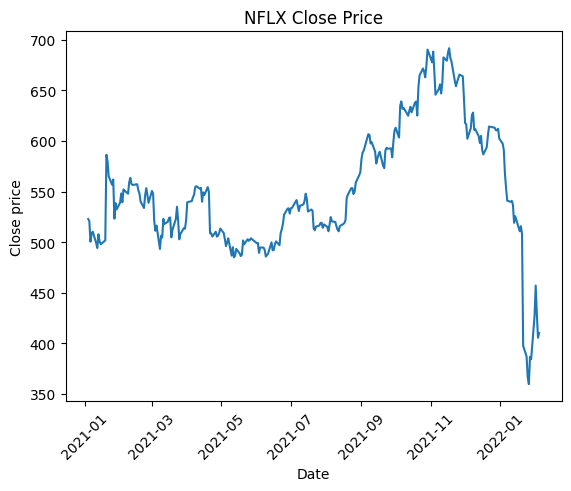

In [60]:
# import matplotlib.pyplot as plt (만일 위에서 안했다면 import해줘야 함1)

x = filtered_df["Date"] # x 좌표값
y = filtered_df["Close"] # y 좌표값

# 그래프 그리기
plt.plot(x, y)

# 그래프에 제목, 축 레이블 추가
plt.title("NFLX Close Price")
plt.xlabel("Date")
plt.ylabel("Close price")

# x축 회전시켜 가독성 키우기
plt.xticks(rotation=45)

# 그래프 표시
plt.show()

# C. 데이터 분석 - 2021년 이후 최고, 최저 종가 출력하기
2021년 이후의 데이터만 필터링된 파일에서, 종가(Close) 필드를 활용하여, 2021년 이후 가장 높은 종가와 가장 낮은 종가를 출력한다. 

In [61]:
max_price = filtered_df["Close"].max()
min_price = filtered_df["Close"].min()

print("최고 종가:", max_price)
print("최저 종가:", min_price)   #언제 print를 쓰는 거지?

최고 종가: 691.690002
최저 종가: 359.700012


# D. 데이터 분석 - 2021년 이후 월 별 평균 종가 출력하기
월 별로 그룹화하여 평균 종가를 계산한 새로운 df를 만들어 그래프로 시각화한다. 

C:\Users\SSAFY\AppData\Local\Temp\ipykernel_16296\320863776.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df["Y-m"] = filtered_df["Date"].dt.strftime("%Y-%m")


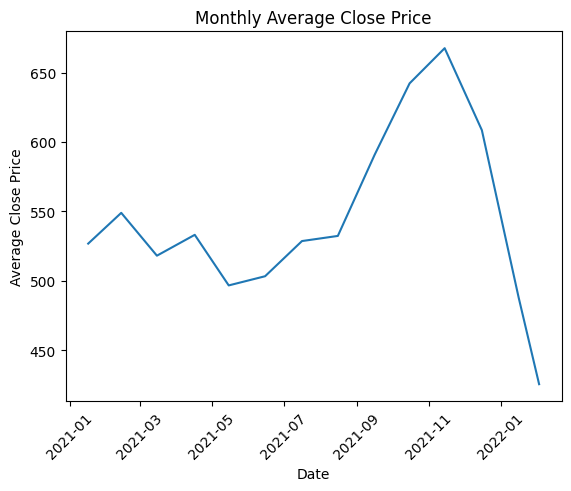

In [9]:
# 월 별로 그룹화. datatime으로 바뀐 데이터는 dt.year, dt.quarter등 다양한 함수를 통해 그룹화할 수 있다. 
# 연-월만을 뽑을 수 있는 메서드가 datetime 내에 존재한다..? 그거 새로운 열로 해서 그룹화하면 될 것 같은디
# 문제가 되는 건 월이 해를 거듭하면서 중복된다는 거! 그래서 연/월을 뽑아줘야 함.

csv_path = "archive/NFLX.csv"
df = pd.read_csv(csv_path)
df = df[["Date", "Open", "High", "Low", "Close"]]
df["Date"] = pd.to_datetime(df["Date"])
filtered_df = df[df["Date"] >= '2021-01-01']

# 날짜 중 연-월만 뽑아내기
filtered_df["Y-m"] = filtered_df["Date"].dt.strftime("%Y-%m")

# 월 별 평균 구하기
month_df = filtered_df.groupby(by="Y-m").mean()
month_df = month_df.reset_index()

# # 월 별 종가 평균을 그래프로 나타내기
# # ver.1
# x = month_df.index
# y = month_df["Close"]

# ver.2
x = month_df["Date"] # or month_df["Y-m"]도 괜츈
y = month_df["Close"]

# 그래프 그리기
plt.plot(x, y)

# 그래프에 제목, 축 레이블 추가
plt.title("Monthly Average Close Price")
plt.xlabel("Date")
plt.ylabel("Average Close Price")

# x축 회전시켜 가독성 키우기
plt.xticks(rotation=45)

# 그래프 표시
plt.show()



# E. 데이터 시각화 - 2022년 이후 최고, 최저, 종가 시각화하기
2022년 이후의 데이터만 필터링<br>
Matplotlib를 활용하여 3가지 필드를 한 번에 분석하고 시각화

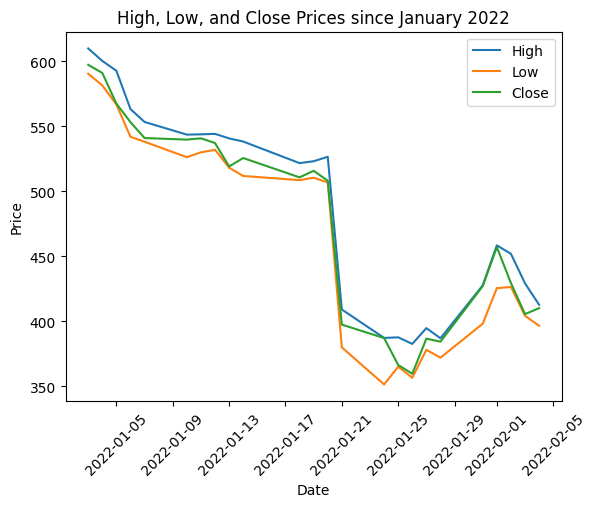

In [113]:
csv_path = "archive/NFLX.csv"
df = pd.read_csv(csv_path)
df = df[["Date", "Open", "High", "Low", "Close"]]
df["Date"] = pd.to_datetime(df["Date"])
df_after_2022 = df[df["Date"] >= '2022-01-01']

#그래프 그리기 : plt.plot(x축, y축, 레이블 이름)
plt.plot(df_after_2022["Date"], df_after_2022["High"], label="High")
plt.plot(df_after_2022["Date"], df_after_2022["Low"], label="Low")
plt.plot(df_after_2022["Date"], df_after_2022["Close"], label="Close")

plt.title("High, Low, and Close Prices since January 2022")
plt.xlabel("Date")
plt.ylabel("Price")

plt.xticks(rotation=45)
# 범례 표시
plt.legend()

plt.show()